In [31]:
import pandas as pd ##Data manipulation and data analysis
import numpy as np ##Support for large multi-dimensional arrays and matrix
import seaborn as sb ## Statistical plotting of data like styles,color
import matplotlib.pyplot as plt ## For plotting

##sklearn-all data-mining concepts which are interoperate with python

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split ##train and test split
from sklearn import metrics ## accuracy calculation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [33]:
# loading the data 
Bank_loan = pd.read_csv("F:\\PROJECTs\\Bank_Loan_Default_Case\\bank-loan.csv")
Bank_loan.head(5) # can see the first 5 rows of data

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


1    460
2    235
3    101
4     49
5      5
Name: ed, dtype: int64

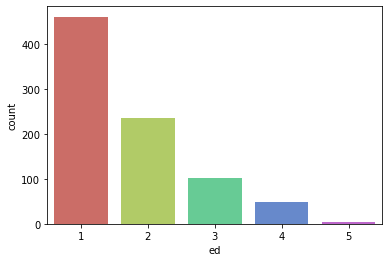

In [34]:
##Getting the barplot for the categorical columns
sb.countplot(x="ed",data=Bank_loan,palette="hls")
Bank_loan.ed.value_counts() ##For numerical count



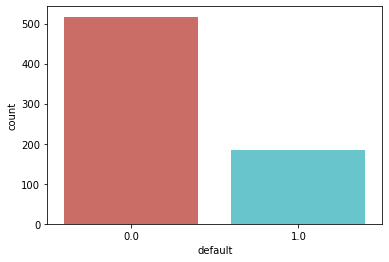

In [35]:
sb.countplot(x="default",data=Bank_loan,palette="hls")

In [36]:
Bank_loan.default.value_counts() ##For numerical count

0.0    517
1.0    183
Name: default, dtype: int64

##### Data Distribution - Boxplot of continuous variables wrt to each category of categorical columns

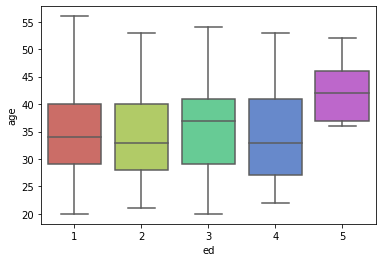

In [37]:
## x= ed
sb.boxplot(x="ed",y="age",data=Bank_loan,palette="hls")

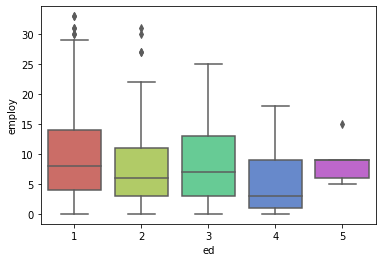

In [38]:
sb.boxplot(x="ed",y="employ",data=Bank_loan,palette="hls")

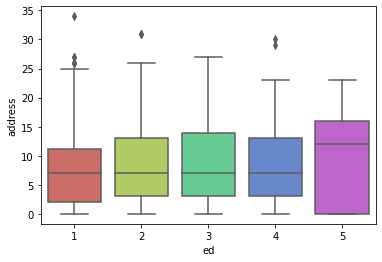

In [39]:
sb.boxplot(x="ed",y="address",data=Bank_loan,palette="hls")


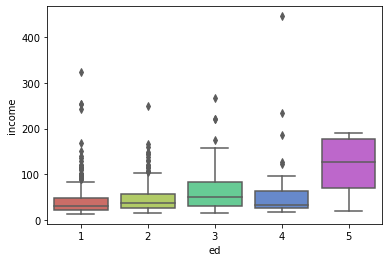

In [40]:
sb.boxplot(x="ed",y="income",data=Bank_loan,palette="hls")

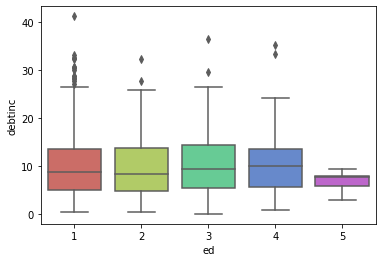

In [41]:
sb.boxplot(x="ed",y="debtinc",data=Bank_loan,palette="hls")

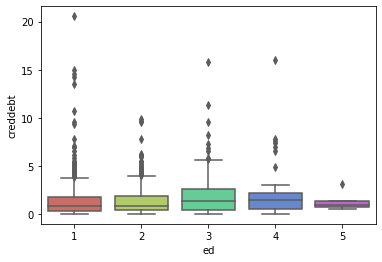

In [42]:
sb.boxplot(x="ed",y="creddebt",data=Bank_loan,palette="hls")

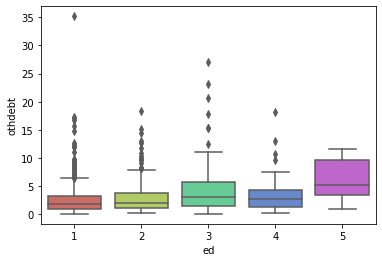

In [43]:
sb.boxplot(x="ed",y="othdebt",data=Bank_loan,palette="hls")

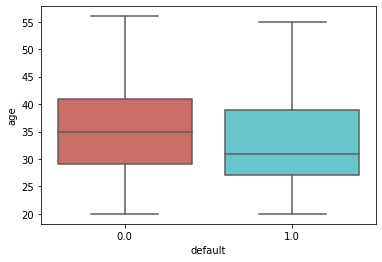

In [44]:
## x= default

sb.boxplot(x="default",y="age",data=Bank_loan,palette="hls")

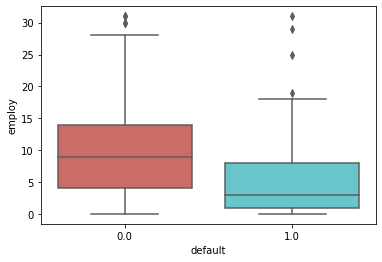

In [45]:
sb.boxplot(x="default",y="employ",data=Bank_loan,palette="hls")

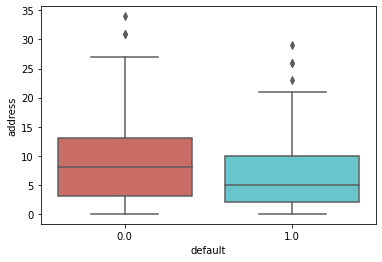

In [46]:
sb.boxplot(x="default",y="address",data=Bank_loan,palette="hls")

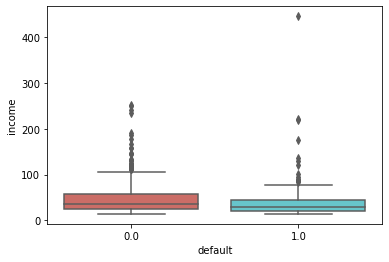

In [47]:
sb.boxplot(x="default",y="income",data=Bank_loan,palette="hls")

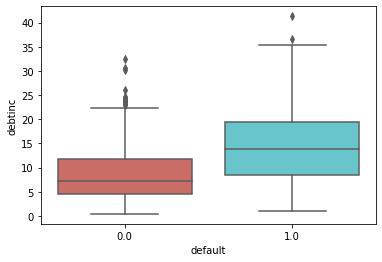

In [48]:
sb.boxplot(x="default",y="debtinc",data=Bank_loan,palette="hls")

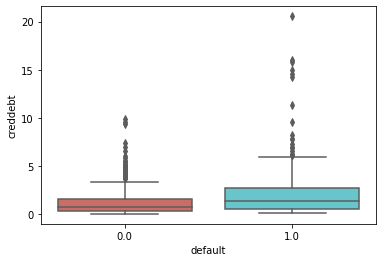

In [49]:
sb.boxplot(x="default",y="creddebt",data=Bank_loan,palette="hls")

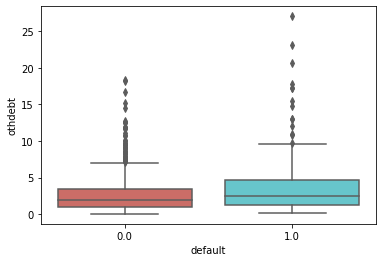

In [50]:
sb.boxplot(x="default",y="othdebt",data=Bank_loan,palette="hls")

##### Data Distribution - Boxplot of continuous variables wrt to each category of categorical columns

In [51]:
##convert the types
Bank_loan['default'] = pd.Categorical(Bank_loan.default)
print (Bank_loan.dtypes)
Bank_loan["ed"] = pd.Categorical(Bank_loan.ed)
print(Bank_loan.dtypes)

age            int64
ed             int64
employ         int64
address        int64
income         int64
debtinc      float64
creddebt     float64
othdebt      float64
default     category
dtype: object
age            int64
ed          category
employ         int64
address        int64
income         int64
debtinc      float64
creddebt     float64
othdebt      float64
default     category
dtype: object


In [52]:
##count the na value
Bank_loan.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [53]:
##Fill nan values with mode of categorical coloumn
##Mode value imputation
Bank_loan.default.mode()
Bank_loan["default"].fillna(0,inplace=True) #mode of default variable is 0


In [54]:
##Check again the na value
Bank_loan.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [55]:
##Model Building (Define X and Y)

X = Bank_loan.iloc[:,[0,1,2,3,4,5,6,7]]
Y = Bank_loan.iloc[:,8]

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

In [57]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [58]:
print (classifier.intercept_,classifier.coef_) # coefficient of features
prob = classifier.predict_proba (X_test) ##Probality values


[-1.99266934] [[ 0.02304386  0.08592019 -0.20164012 -0.06398255 -0.00115461  0.08972409
   0.3653377  -0.00738194]]


In [59]:
##Accuracy on train data 
predict_train = classifier.predict(X_train)
print('Target on train data',predict_train)


Target on train data [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [60]:

accuracy_train = accuracy_score(Y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.8100840336134454


In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_train,predict_train)
print(confusion_matrix)


[[434  25]
 [ 88  48]]


In [62]:
##Accuracy on test data
predict_test = classifier.predict(X_test)
print('Target on test data',predict_test) 

Target on test data [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]


In [63]:
accuracy_test =accuracy_score(Y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8509803921568627


In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,predict_test)
print(confusion_matrix)


[[200   8]
 [ 30  17]]


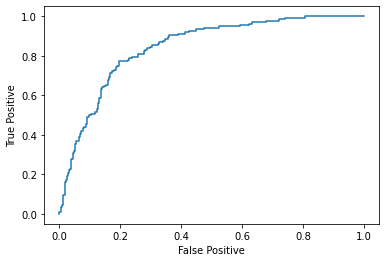

In [65]:
y_prob = pd.DataFrame(classifier.predict_proba(X_train.iloc[:,:]))
fpr,tpr,thresholds = metrics.roc_curve(Y_train,y_prob.iloc[:,1:])
fig,ax = plt.subplots()
plt.plot(fpr,tpr);
plt.xlabel("False Positive");plt.ylabel("True Positive");
##ROC curve


In [66]:
##ROC curve
fpr,tpr,thresholds = metrics.roc_curve(Y_train,y_prob.iloc[:,1:])

In [67]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.8441464821222606

## Decision Tree

In [68]:
colnames = list(Bank_loan.columns)##It make list of all the variables in Bank_loan
predictors = colnames[:8] ##It 
target = colnames[8]

In [69]:
train,test = train_test_split(Bank_loan,test_size = 0.3,random_state = 1)

In [70]:
train.default.value_counts()

0.0    459
1.0    136
Name: default, dtype: int64

In [71]:
test.default.value_counts()

0.0    208
1.0     47
Name: default, dtype: int64

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(train[predictors],train[target])

DecisionTreeClassifier(criterion='entropy')

In [74]:
##Accuracy for train
np.mean(pd.Series(train.default).reset_index(drop=True) == pd.Series(model.predict(train[predictors])))

1.0

In [75]:
##Accuracy for test 
np.mean(pd.Series(test.default).reset_index(drop=True) == pd.Series(model.predict(test[predictors])))

0.7411764705882353

## Random Forest Regression

In [76]:
Bank_loan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [77]:
Bank_loan["default"].unique()

[1.0, 0.0]
Categories (2, float64): [1.0, 0.0]

In [78]:
Bank_loan.default.value_counts()


0.0    667
1.0    183
Name: default, dtype: int64

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,oob_score=True,n_estimators=15,criterion="entropy")


In [80]:
rf.fit(X_train,Y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=2,
                       oob_score=True)

In [81]:
##Accuracy of training data by classifier method
predictions = rf.predict(X_train)
classification_report(Y_train,predictions)

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00       459\n         1.0       1.00      0.99      1.00       136\n\n    accuracy                           1.00       595\n   macro avg       1.00      1.00      1.00       595\nweighted avg       1.00      1.00      1.00       595\n'

In [82]:
# Check the accuracy by confusion matrix

X_train["rf_pred"] = rf.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train,X_train["rf_pred"]) # Confusion matrix
print ("Accuracy",(459+132)/(459+133+0+3)) ## 99.32


Accuracy 0.9932773109243698


In [83]:
rf.fit(X_test,Y_test)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=2,
                       oob_score=True)

In [84]:
predictions1= rf.predict(X_test)


In [85]:
classification_report(Y_test,predictions1)

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00       208\n         1.0       1.00      1.00      1.00        47\n\n    accuracy                           1.00       255\n   macro avg       1.00      1.00      1.00       255\nweighted avg       1.00      1.00      1.00       255\n'

In [86]:
##Check the accuracy of test data by confusion matrix

X_test["rf_pred"] = rf.predict(X_test)
confusion_matrix(Y_test,X_test["rf_pred"])
print ("Accuracy",(208+45)/(208+45+2+0)) # 99.21


Accuracy 0.9921568627450981
